#  House Price Prediction Analysis




### Dataset has been sourced from 'The real estate portal of the National Registry of Iceland' https://www.skra.is/

### Dataset consists of prices of houses which were sold during 2011-2017 in Iceland

### In this project, I have tried to find the the best variables for house price predictions with two different approaches of  Regression analysis:

#### The first one is by keeping most of the data as is, without enough cleaning

#### The second one  is by removing irrelevant data by applying different data cleaning & model tuning techniques

### Second approach, using HyperParamter Tuning of Random Forest Regression on better cleaned data provided the best results.







### First Approach having Partially Cleaned Dataset:

#### 1. String to Numeric Direct Mapping
#### 2. Dropping Unnecessary columns
#### 3. Outlier Removal using Boxplot
#### 4. Removing nulls, NaN and extreme values
#### 5. Linear Regression & QQ Plot:
###### i. Mean Absolute Percentage Error (MAPE): 0.28415481279757837
###### ii. R^2: 0.5802626282718357
###### iii. RMSE: 8966.3011848338
#### 6. Random Forest Regression:
###### i. RMSE: 5825.375011217878


### Second Approach by removing more irrelevant data and using better Cleaning techniques

#### 1. One Hot Encoding of Categorical Parameters
#### 2. Outlier Removal Using Distribution Percentage
#### 3. Outlier Removal using IQR
#### 4. Multicollinearity using Variance Inflation Factor (VIF)
#### 5. Random Forest Regression (Base):
##### i. Mean Absolute Percentage Error (MAPE): 0.13221188931580022
##### ii. R^2: 0.8449056160731143
##### iii. Average Error: 2715.5796 degrees.
##### iv. Accuracy = 86.78%.
#### 6. Hyper Parameter Tuning (Grid Search) on Random Forest Regression:
##### i. Mean Absolute Percentage Error (MAPE): 0.12957688208429297
##### ii. R^2: 0.8553158264404283
##### iii. Average Error: 2631.7852 degrees.
##### iv. Accuracy = 87.04%.
##### v. Improvement of 0.30% in Grid Accuracy w-r-t Base Accuracy








In [3]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
from sklearn import metrics
import random
import tabulate
%matplotlib inline

In [4]:
# Loading Dataset from the local directory

Data=pd.read_csv('Iceland_House_Prediction.csv')

In [5]:
# Checking list of headers/columns

print(Data.columns)

Index(['ID of real estate', 'Date Of Purchase', 'Value Of Real estate',
       'Type Of Property', 'Id Of municipality', 'Year Of Construction',
       'Floor Number', 'Elevator available', 'Square Meters Of Property',
       'No. Of Floors', 'No. Of Parking spaces', 'No. of Bath Tubs',
       'No. of showers', 'No. of Toilets', 'No. of Kitchens', 'No. of rooms',
       'No. of living rooms', 'No. of storage spaces',
       'Measurement of completeness', 'Location Of Property',
       'Sub-location property', 'Type of property'],
      dtype='object')


In [6]:
# Shortening column names to properly fit in visualizations and to be comfortably used in the code.

Data.rename(columns={'ID of real estate':'Id', 'Date Of Purchase':'SaleDate', 'Value Of Real estate':'Price',
       'Type Of Property':'PropertyType', 'Id Of municipality':'MunicipalityId', 'Year Of Construction':'YearBuilt',
       'Floor Number':'FloorN', 'Elevator available':'ElevatorE', 'Square Meters Of Property':'M2',
       'No. Of Floors':'NFloor', 'No. Of Parking spaces':'NParking', 'No. of Bath Tubs':'NBathTub',
       'No. of showers':'NShowers', 'No. of Toilets':'NToilets', 'No. of Kitchens':'NKitchens', 'No. of rooms':'NRooms',
       'No. of living rooms':'NLivingroom', 'No. of storage spaces':'NStorages',
       'Measurement of completeness':'Completeness', 'Location Of Property':'Location',
       'Sub-location property':'Sublocation', 'Type of property':'TypeofProperty'},  inplace=True)



In [7]:
# To find unique values of PropertyType column

set(Data['PropertyType']) # To know the values of PropertyType enum

{'Residential House', 'Semi-Detached House', 'Town House', 'Villa'}

In [8]:
# Mapping string to numbers to make it compatible for Regression models

for i in range(len(Data)):   
    if Data['PropertyType'][i]=='Residential House':
        Data['TypeofProperty'][i]=1
    elif Data['PropertyType'][i]=='Semi-Detached House':
        Data['TypeofProperty'][i]=2
    elif Data['PropertyType'][i]=='Town House':
        Data['TypeofProperty'][i]=3
    else:
        Data['TypeofProperty'][i]=4
        

C:\Users\farha\AppData\Local\Temp\ipykernel_14520\1339878408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['TypeofProperty'][i]=1
C:\Users\farha\AppData\Local\Temp\ipykernel_14520\1339878408.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['TypeofProperty'][i]=4
C:\Users\farha\AppData\Local\Temp\ipykernel_14520\1339878408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['TypeofProperty'][i]=2
C:\Users\farha\A

In [9]:
# Feature Engineering: Dropping unnecessary columns which are just identifiers

Data= Data.drop(["Id", "MunicipalityId", "Sublocation", "PropertyType"], axis=1) 

In [10]:
Data.describe()

,Price,FloorN,ElevatorE,M2,NFloor,NParking,NBathTub,NShowers,NToilets,NKitchens,NRooms,NLivingroom,NStorages,Completeness,Location,TypeofProperty
count,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.00000,34865.000000,34865.000000
mean,28381.167905,1.873311,0.321239,107.074470,1.213280,0.150724,0.786347,0.528295,1.196042,1.006109,2.618414,1.220909,0.550667,9.95048,1595.087452,1.684354
std,14383.782264,1.437303,0.808793,44.372459,0.469285,0.397219,0.435671,0.565428,0.459558,0.159027,1.352502,0.514603,0.675082,0.46213,2464.155042,1.162597
min,400.000000,-1.000000,0.000000,17.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000,11.000000,1.000000
25%,19124.000000,1.000000,0.000000,77.500000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,10.00000,130.000000,1.000000
50%,25461.000000,1.000000,0.000000,98.600000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,10.00000,340.000000,1.000000
75%,34493.000000,2.000000,0.000000,125.900000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,10.00000,2040.000000,2.000000
max,203781.000000,16.000000,8.000000,618.400000,4.000000,25.000000,6.000000,4.000000,5.000000,4.000000,32.000000,20.000000,9.000000,10.00000,8200.000000,4.000000


In [11]:
# List of filtered Columns/Parameters
L=['FloorN','ElevatorE','M2','NFloor','NParking','NBathTub','NShowers','NToilets','NKitchens','NRooms','NLivingroom','NStorages','Completeness']



In [12]:
plot_dims = (14, 9)
L=list(set(L)-{'M2'})

[Text(0.5, 0, 'Coloums'), Text(0, 0.5, 'Numbers')]

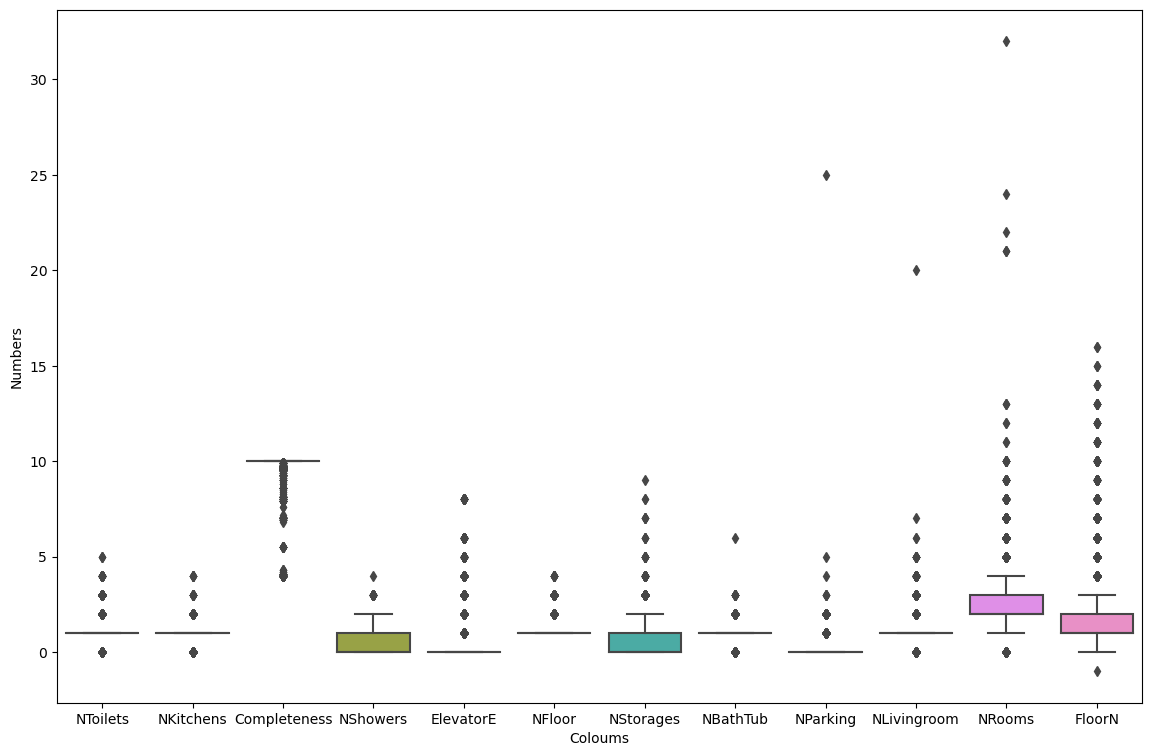

In [13]:
# Plotting BoxPlot to visualize outliers and range of values in each parameters

fig, ax = plt.subplots(figsize=plot_dims)
sn.boxplot( data=Data[L])
ax.set(xlabel='Coloums', ylabel='Numbers')

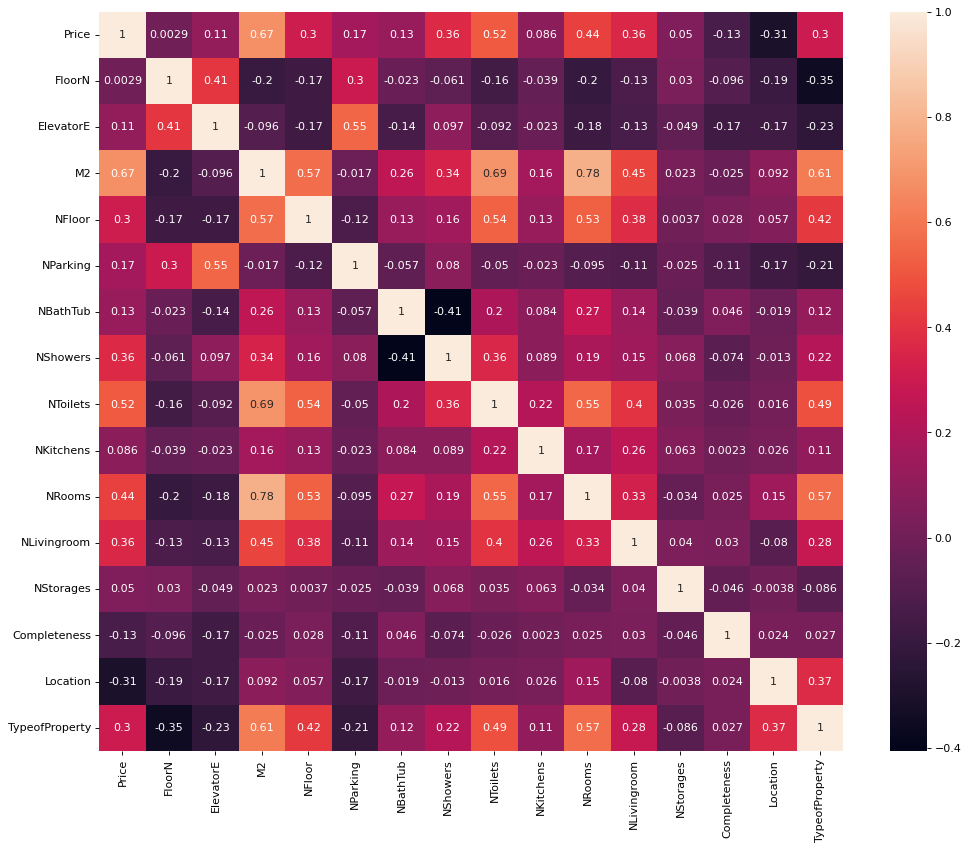

In [14]:
#Plotting Correlation Matrix

plt.figure(figsize=(15, 12), dpi=80)
corrMatrix = Data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# First Approach : By removing MisFit data

## Removing Outliers 

In [70]:
# Outlier removal inferred from box plot
# Keeping usual no of rooms, living rooms & parkings.

Data=Data[(Data.NRooms<8)& ( Data.NLivingroom <4)& (Data.NParking<4) ] 
index= [i for i in range(len(Data))]
Data['index']=index
Data.set_index('index', inplace=True)

In [16]:
def convertToDateTime(df, columnName, dateFormat = "%d/%m/%Y"):
    return pd.to_datetime(df[columnName], format=dateFormat)

In [17]:
Data["SaleDate"] = convertToDateTime(Data, "SaleDate").dt.year
Data["YearBuilt"] = convertToDateTime(Data, "YearBuilt").dt.year

[Text(0.5, 0, 'Coloums'), Text(0, 0.5, 'Numbers')]

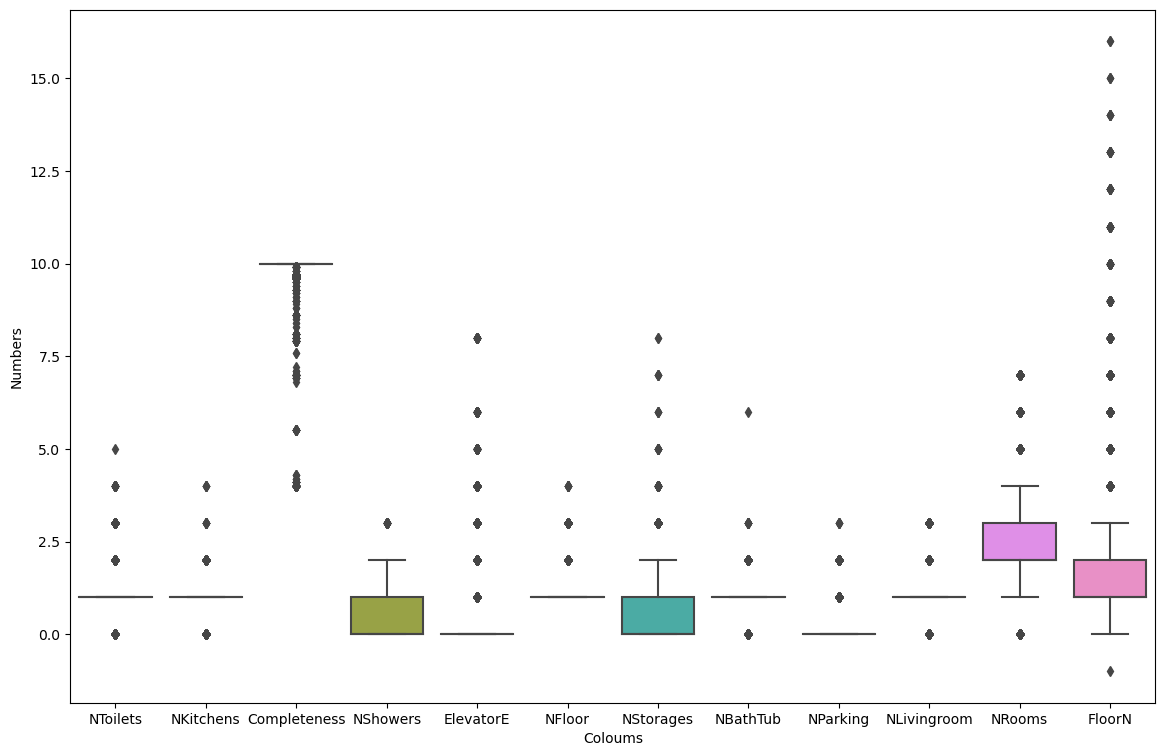

In [18]:
L=list(set(L)-{'M2'})
fig, ax = plt.subplots(figsize=plot_dims)
sn.boxplot( data=Data[L])
ax.set(xlabel='Coloums', ylabel='Numbers')

In [19]:
# Function for data cleaning
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"  # Removing NULL
    df.dropna(inplace=True)  # Removing row which has null value for any of the column
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)  # Removing row with NAN, infinity and negative infinity values
    return df[indices_to_keep].astype(np.float64)

In [20]:
Data=clean_dataset(Data)

In [21]:
# Furher filtering to improve accuracy, dropped M2 and Completeness
X=Data.drop(['Price', 'M2', 'Completeness' ], axis=1).values 
y=Data['Price'].values

In [22]:
# Splitting Dataset - 80% train 20% test
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=25)  

In [23]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Linear model with first approach (Partially cleaned dataset)

In [24]:

reg = LinearRegression().fit(X_train, y_train)


In [25]:
y_pred=reg.predict(X_test)

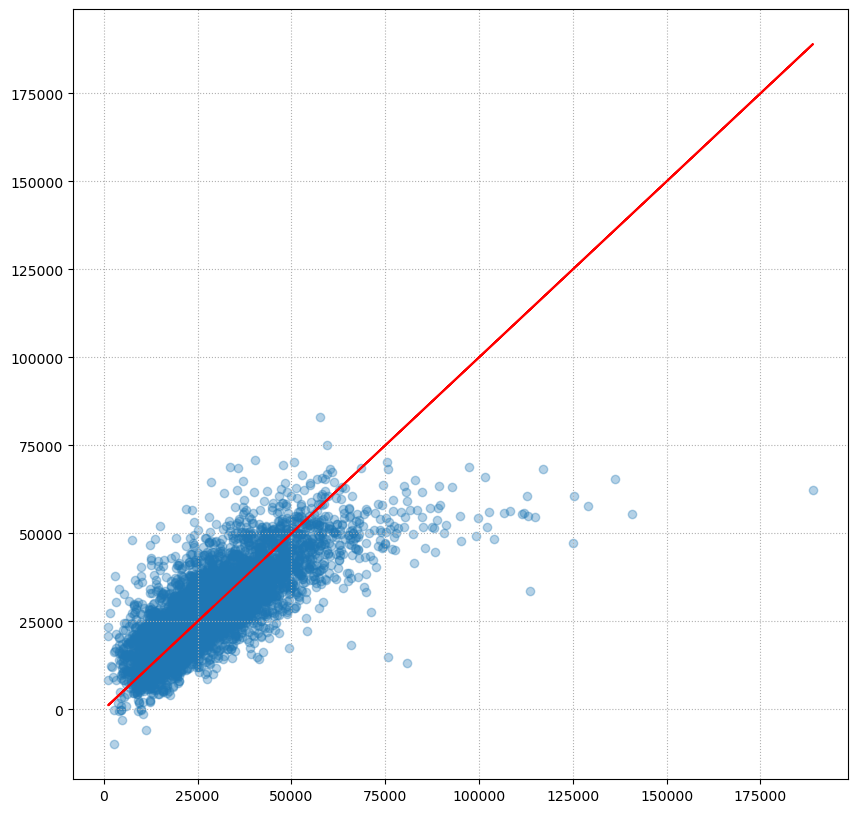

In [26]:
fig = plt.figure(figsize =(10, 10))
plt.scatter(y_test,y_pred , alpha=1/3)
plt.plot(y_test,y_test,color="red")

plt.grid(.5,ls=":")
plt.show()

Text(0.5, 1.0, 'Model Residuals Q-Q Plot')

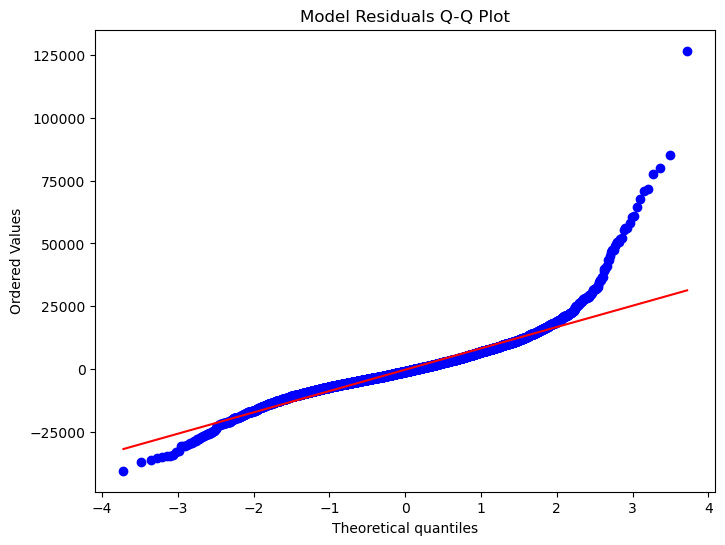

In [27]:
# Q Plot to visualize the accuracy of the model

import pylab 
import scipy.stats as stats
res=y_test-y_pred
fig = plt.figure(figsize =(8, 6)) 
stats.probplot(res, dist="norm", plot= plt)
plt.title("Model Residuals Q-Q Plot")    

   ## Fig: QQ plot shows that residual is not completely normaly distributed

In [28]:
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Percentage Error (MAPE): 0.28415481279757837
R^2: 0.5802626282718357


In [29]:
RMSE=np.sqrt(np.mean(np.square(y_test-y_pred)))

In [30]:
RMSE

8966.3011848338

In [31]:
y_trainPred=reg.predict(X_train)

In [32]:
RMSEofTrain=np.sqrt(np.mean(np.square(y_train-y_trainPred)))

In [33]:
RMSEofTrain

9099.255965148379

# Random Forest with first approach (Partially cleaned dataset)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


In [35]:
regr = RandomForestRegressor(n_estimators=200)
regr.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200)

In [36]:
yhat = regr.predict(X_test)

In [37]:
RMSE=np.sqrt(np.mean(np.square(y_test-yhat)))
RMSE

5825.375011217878

In [38]:
regr.feature_importances_


array([0.06124975, 0.12436242, 0.03243041, 0.0074313 , 0.00987711,
       0.00700818, 0.00701515, 0.01922258, 0.26291005, 0.00314728,
       0.08398761, 0.02011432, 0.01486623, 0.27530951, 0.07106811])

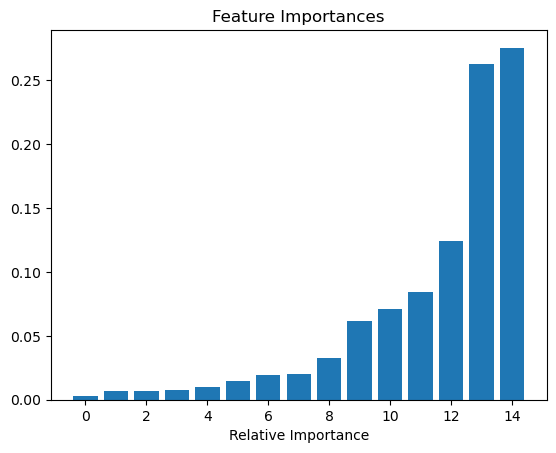

In [39]:
importances = regr.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xlabel('Relative Importance')
plt.show()

# Second Approach by removing more irrelevant data and better Cleaning

In [40]:
def column_value_filter(df, columnName, values, **kargs):  
    return df[df[columnName].isin(values)]

In [41]:
def convertToObject(df, columnName):
    return df[columnName].astype(object)

In [42]:
def convertToDateTime(df, columnName, dateFormat = "%d/%m/%Y"):
    return pd.to_datetime(df[columnName], format=dateFormat)

In [43]:
Data=pd.read_csv('Iceland_House_Prediction.csv')

In [44]:
Data.rename(columns={'ID of real estate':'Id', 'Date Of Purchase':'SaleDate', 'Value Of Real estate':'Price',
       'Type Of Property':'PropertyType', 'Id Of municipality':'MunicipalityId', 'Year Of Construction':'YearBuilt',
       'Floor Number':'FloorN', 'Elevator available':'ElevatorE', 'Square Meters Of Property':'M2',
       'No. Of Floors':'NFloor', 'No. Of Parking spaces':'NParking', 'No. of Bath Tubs':'NBathTub',
       'No. of showers':'NShowers', 'No. of Toilets':'NToilets', 'No. of Kitchens':'NKitchens', 'No. of rooms':'NRooms',
       'No. of living rooms':'NLivingroom', 'No. of storage spaces':'NStorages',
       'Measurement of completeness':'Completeness', 'Location Of Property':'Location',
       'Sub-location property':'Sublocation', 'Type of property':'TypeofProperty'},  inplace=True)

In [45]:
dataCleaned = Data.copy()

In [46]:
dataCleaned

,Id,SaleDate,Price,PropertyType,MunicipalityId,YearBuilt,FloorN,ElevatorE,M2,NFloor,...,NShowers,NToilets,NKitchens,NRooms,NLivingroom,NStorages,Completeness,Location,Sublocation,TypeofProperty
0,10580956,02/11/2011,18636,Residential House,0,01/01/1970,2,0,117.0,1,...,0,1,1,3,1,2,10.0,200,0,12
1,10779688,31/10/2011,17533,Residential House,0,01/01/1953,0,0,67.9,1,...,1,1,1,1,1,1,10.0,70,0,12
2,10712711,07/10/2011,14472,Residential House,0,01/01/1921,0,0,45.7,1,...,1,1,1,1,1,0,10.0,20,0,12
3,10774018,28/10/2011,14850,Residential House,0,01/01/1967,1,0,78.1,1,...,0,1,1,2,1,1,10.0,200,0,12
4,10891899,03/11/2011,20831,Residential House,0,01/01/1952,0,0,87.4,1,...,0,1,1,2,1,2,10.0,70,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34860,10719030,01/11/2011,25133,Town House,0,01/01/1981,1,0,128.2,2,...,0,2,1,4,2,0,10.0,160,0,11
34861,10077682,02/11/2011,14700,Residential House,0,01/01/1970,1,0,38.7,1,...,1,1,1,1,1,1,10.0,280,0,12
34862,10298834,26/10/2011,44896,Villa,0,01/01/1981,1,0,222.4,3,...,1,2,1,6,2,0,10.0,150,0,11
34863,10306230,02/11/2011,11698,Residential House,0,01/01/1975,2,0,48.4,1,...,0,1,1,1,1,0,10.0,160,0,12


In [47]:
# Date format change to Year integers for consistensy

dataCleaned["SaleDate"] = convertToDateTime(dataCleaned, "SaleDate").dt.year
dataCleaned["YearBuilt"] = convertToDateTime(dataCleaned, "YearBuilt").dt.year  

In [48]:
dataCleaned = dataCleaned.drop(["Id", "MunicipalityId", "Sublocation", "TypeofProperty"], axis=1)  ##Syed - Dropping some columns which are just identifiers and for FEATURE ENGINEERING (on basis of Varaiance Inflation Factor) 

In [49]:
# Get  columns whose data type is object i.e. string
# Finding all categorical Non numeric columns

filteredObjectColumns = dataCleaned.dtypes[dataCleaned.dtypes == np.dtype('object')].index  
listOfColumnNames = list(filteredObjectColumns)
print(listOfColumnNames)

['PropertyType']


# Outlier Removal Using Distribution Percentage

In [50]:
# Outlier removal bleow 5% of total distinct value

def outlierRemovalByPercentage(df, excludedColumns, removalPercentage = 5):
    resultValueOptions = {}
    for i in df.loc[:, ~df.columns.isin(excludedColumns)].columns:
        value_percentage_difference = df[i].value_counts(normalize=True)*100 >= removalPercentage
        resultValueOptions[value_percentage_difference[
            value_percentage_difference].name] = value_percentage_difference[
            value_percentage_difference].index.values
    return resultValueOptions

In [51]:
# Feature Engineering

dataImputed = dataCleaned.copy()
continousExcludedColumns = ["Price", "M2", "YearBuilt"]
excludedColumns = continousExcludedColumns +  ["SaleDate", "Location", "Completeness"] 
for key,value in outlierRemovalByPercentage(
    dataImputed, excludedColumns + listOfColumnNames, 5).items():  # M2 have unique which are not repeated (Continous) so outliers can't be romved using percentage for these columns
    print(key,value)                                               # If we keep these columns then no of rows removed drastically on applying outlier filtering
    dataImputed = column_value_filter(dataImputed,key,value)

FloorN [1 2 3 4]
ElevatorE [0 1]
NFloor [1 2]
NParking [0 1]
NBathTub [1 0]
NShowers [0 1]
NToilets [1 2]
NKitchens [1]
NRooms [2 3 1 4]
NLivingroom [1 2]
NStorages [0 1 2]


In [52]:
dataImputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24631 entries, 0 to 34863
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SaleDate      24631 non-null  int64  
 1   Price         24631 non-null  int64  
 2   PropertyType  24631 non-null  object 
 3   YearBuilt     24630 non-null  float64
 4   FloorN        24631 non-null  int64  
 5   ElevatorE     24631 non-null  int64  
 6   M2            24631 non-null  float64
 7   NFloor        24631 non-null  int64  
 8   NParking      24631 non-null  int64  
 9   NBathTub      24631 non-null  int64  
 10  NShowers      24631 non-null  int64  
 11  NToilets      24631 non-null  int64  
 12  NKitchens     24631 non-null  int64  
 13  NRooms        24631 non-null  int64  
 14  NLivingroom   24631 non-null  int64  
 15  NStorages     24631 non-null  int64  
 16  Completeness  24631 non-null  float64
 17  Location      24631 non-null  int64  
dtypes: float64(3), int64(14), 

# Inter Quartile Range

In [53]:
def remove_outlier_IQR(df):  # Way to remove outliers in continous columns like M2 and also discrete numerical values
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

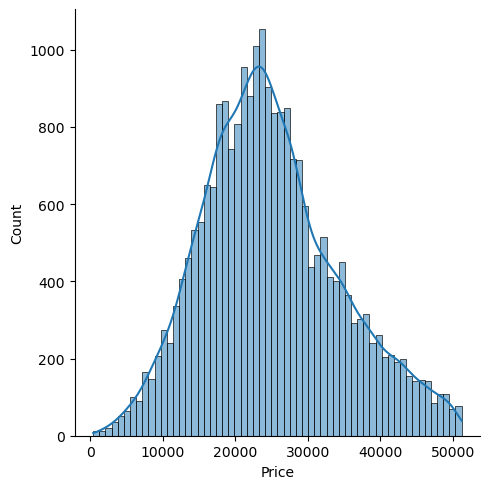

In [54]:
# Performing outlier removal for price
# Also tried with other continouns & discrete values but it did't improve accuracy

for column in ["Price"]:   
    outlierRemovedColumn = remove_outlier_IQR(dataImputed[column])
    dataImputed[column] = outlierRemovedColumn
    sn.displot(outlierRemovedColumn, kde=True)

# One Hot Encoding of Categorical Parameters

In [55]:
# Applying OneHot Encoding on 'propertyType' colum which is an object and thus not accepted in reg model
# We converted propertyType values into Numerical BYTECODE to make it compatible with the models

dataImputed = dataImputed.dropna() 
dataImputed = pd.get_dummies(dataImputed, prefix=None,
                   dummy_na=False, columns=["PropertyType"], 
                   sparse=False, drop_first=True, dtype=None)
dataImputed.info(max_cols= 2000)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23927 entries, 0 to 34863
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SaleDate                          23927 non-null  int64  
 1   Price                             23927 non-null  float64
 2   YearBuilt                         23927 non-null  float64
 3   FloorN                            23927 non-null  int64  
 4   ElevatorE                         23927 non-null  int64  
 5   M2                                23927 non-null  float64
 6   NFloor                            23927 non-null  int64  
 7   NParking                          23927 non-null  int64  
 8   NBathTub                          23927 non-null  int64  
 9   NShowers                          23927 non-null  int64  
 10  NToilets                          23927 non-null  int64  
 11  NKitchens                         23927 non-null  int64  
 12  NRoo

# Varaiance Inflation Factor with Second Approach
    
### Used to find multicolinerality for each columns with other columns except Price

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [57]:
dataFrames = []
df = dataImputed.copy()
dataFrames.append(df)


In [58]:

for i in dataFrames:
    vif = calc_vif(i.loc[:, ~i.columns.isin(["Price"])])
    print(vif)

                           variables           VIF
0                           SaleDate  1.007759e+00
1                          YearBuilt  1.602012e+00
2                             FloorN  1.359581e+00
3                          ElevatorE  1.479800e+00
4                                 M2  3.904332e+00
5                             NFloor  1.367629e+00
6                           NParking  1.373719e+00
7                           NBathTub  1.751719e+00
8                           NShowers  1.730768e+00
9                           NToilets  1.508289e+00
10                         NKitchens  1.920987e+06
11                            NRooms  2.721503e+00
12                       NLivingroom  1.272276e+00
13                         NStorages  1.050606e+00
14                      Completeness  1.024542e+00
15                          Location  1.375623e+00
16  PropertyType_Semi-Detached House  1.196339e+00
17           PropertyType_Town House  1.408255e+00
18                PropertyType_

In [59]:
# Model EVALUATION

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels, predictions))
    print('R^2:', metrics.r2_score(test_labels, predictions))
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))   
    return accuracy

In [60]:
X=dataFrames[0].drop(['Price'], axis=1).values
y=dataFrames[0]['Price'].values

In [61]:
from sklearn.model_selection import train_test_split  ## data set split - 70% train and 30% test (prediction)
import sklearn.metrics as skmet 

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

# Advanced Technique with Second Approach (Better Cleaned Data)

### Used Hyper Pramater Tuning for finding the best  combination of parameters to maximize the model performance


# Hyper Parameter Tuning

In [62]:
# Instead of doing hit and trial on randomforest parameters, Using HyperParameter Tuning gives us the best combination of parametrs

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [3, 4, 5, 10],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30, 100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [63]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators = 10, random_state = 45)

# fit the regressor with x and y data
reg = regressor.fit(X_train, y_train)
base_accuracy = evaluate(reg, X_test, y_test)

Model Performance
Mean Absolute Percentage Error (MAPE): 0.13221188931580022
R^2: 0.8449056160731143
Average Error: 2715.5796 degrees.
Accuracy = 86.78%.


In [64]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [65]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Mean Absolute Percentage Error (MAPE): 0.12957688208429297
R^2: 0.8553158264404283
Average Error: 2631.7852 degrees.
Accuracy = 87.04%.


In [66]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.30%.


In [67]:
y_pred=best_grid.predict(X_test)

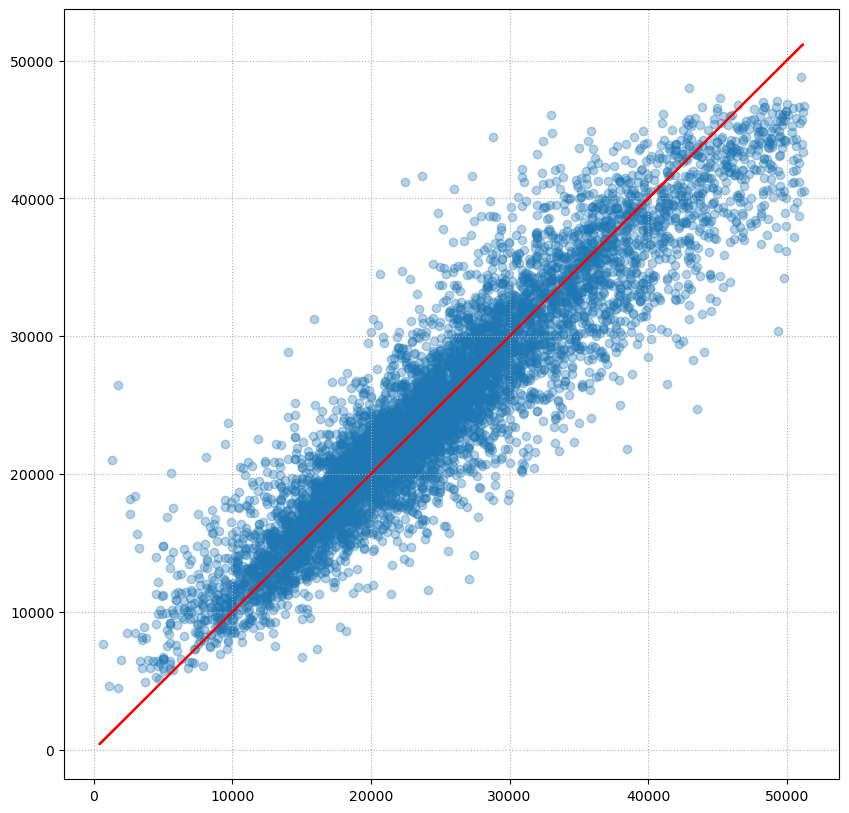

In [68]:
fig = plt.figure(figsize =(10, 10))
plt.scatter(y_test,y_pred , alpha=1/3)
plt.plot(y_train,y_train,color="red")

plt.grid(.5,ls=":")
plt.show()

Text(0.5, 1.0, 'Model Residuals Q-Q Plot')

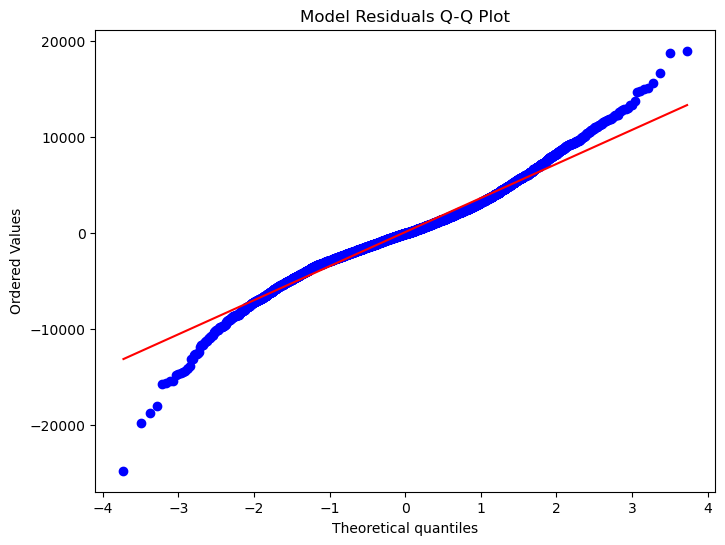

In [69]:
import pylab 
import scipy.stats as stats
res=y_test-y_pred
fig = plt.figure(figsize =(8, 6)) 
stats.probplot(res, dist="norm", plot= plt)
plt.title("Model Residuals Q-Q Plot")